In [2]:
#Importing the needed functions
import pandas as pd
import scipy
import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pickle

/Users/jacksonschreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jacksonschreyer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/5y/cpywppss60x1dr370krrclx40000gn/T/ipykernel_41581/3485444126.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/544

In [3]:
#Making the csv  file into a panda dataframe
ACT_new_species = pd.read_csv("species_ACT_Scenerio_1.csv")
ACT_new_species_subset = ACT_new_species.head(119249)
# Drop rows with NaN values in 'Category', 'Order', 'Family', and 'Occurrence'
ACT_new_species_cleaned = ACT_new_species_subset.dropna(subset=['Category', 'Order', 'Family', 'Occurrence'])
#Remove identified rows which were out of place 
ACT_new_species_cleaned = ACT_new_species_cleaned[~ACT_new_species_cleaned['Occurrence'].isin(['Approved', 'In Review'])] 
#Check they have all been removed
unique_occurrences = ACT_new_species_cleaned['Occurrence'].unique()
print(unique_occurrences)

['Present' 'Not Confirmed' 'Not Present (Historical Report)'
 'Not Present (False Report)' 'Not Present']


In [4]:
# List of columns to keep
columns_to_keep = ["Category", "Order", "Family", "Max_Month_Av", "Min_Month_AV", "Annual_Precipitation"]

# Create a new DataFrame with the selected columns
ACT_inputs2 = ACT_new_species_cleaned[columns_to_keep].copy()

# One-hot encode the specified columns, changing the categorical varibles into binary varibles 
ACT_inputs2_encoded = pd.get_dummies(ACT_inputs2, columns=['Family', 'Category', 'Order'])

# Display the new DataFrame with one-hot encoding
#print(ACT_inputs2_encoded)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
# Assuming 'Occurrence' is your original target variable
target_original = ACT_new_species_cleaned['Occurrence']

# Create a copy of the DataFrame
ACT_new_species_cleaned_copy = ACT_new_species_cleaned.copy()

# Create a new 'Grouped_Occurrence' column based on 'Occurrence'
ACT_new_species_cleaned_copy['Grouped_Occurrence'] = target_original.apply(lambda x: 'Not Present' if x != 'Present' else 'Present')

# Display the updated DataFrame
print(ACT_new_species_cleaned_copy[['Occurrence', 'Grouped_Occurrence']])
# Assuming 'Grouped_Occurrence' is the new grouped target variable
target_grouped = ACT_new_species_cleaned_copy['Grouped_Occurrence']

# Features (X) - Assuming ACT_inputs2_encoded is your feature data
X_grouped = ACT_inputs2_encoded

# Split the data into training and testing sets
X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped = train_test_split(X_grouped, target_grouped, test_size=0.4, random_state=42)

# Create a RandomForestClassifier
rf_classifier_grouped = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier_grouped.fit(X_train_grouped, y_train_grouped)

# Predict on the testing data
y_rf_grouped = rf_classifier_grouped.predict(X_test_grouped)

# Print the accuracy score
accuracy_rf_grouped = accuracy_score(y_test_grouped, y_rf_grouped)
print("Random Forest Accuracy (Grouped Occurrence):", accuracy_rf_grouped)

# Print the confusion matrix
cm_rf_grouped = confusion_matrix(y_test_grouped, y_rf_grouped)
print("Random Forest Confusion Matrix (Grouped Occurrence):")
print(cm_rf_grouped)

# Print classification report
print("Random Forest Classification Report (Grouped Occurrence):")
print(classification_report(y_test_grouped, y_rf_grouped))

           Occurrence Grouped_Occurrence
0             Present            Present
1             Present            Present
2             Present            Present
3       Not Confirmed        Not Present
4             Present            Present
...               ...                ...
119243        Present            Present
119244        Present            Present
119245        Present            Present
119246        Present            Present
119247        Present            Present

[98427 rows x 2 columns]
Random Forest Accuracy (Grouped Occurrence): 0.8395011556729572
Random Forest Confusion Matrix (Grouped Occurrence):
[[ 1318  5002]
 [ 1317 31734]]
Random Forest Classification Report (Grouped Occurrence):
              precision    recall  f1-score   support

 Not Present       0.50      0.21      0.29      6320
     Present       0.86      0.96      0.91     33051

    accuracy                           0.84     39371
   macro avg       0.68      0.58      0.60     39371
weig

In [7]:
# Save the trained model to a file using pickle
with open('random_forest_model_grouped_occurrence2.pkl', 'wb') as file:
    pickle.dump(rf_classifier_grouped, file)

print("Random Forest model for Grouped Occurrence saved successfully.")

Random Forest model for Grouped Occurrence saved successfully.


Text(70.72222222222221, 0.5, 'True')

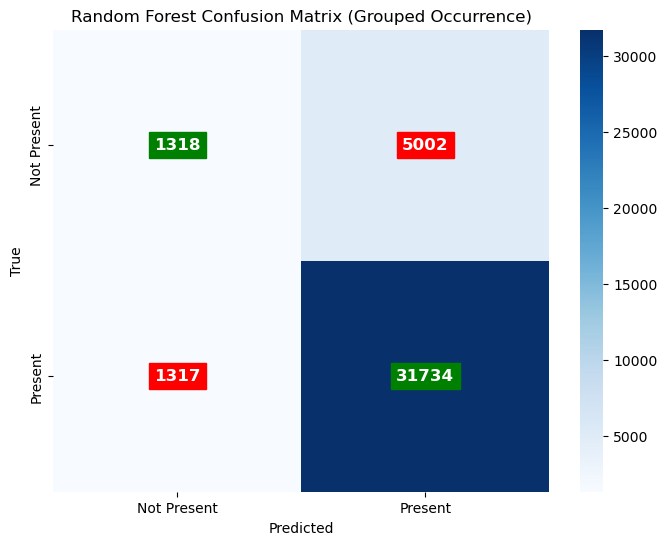

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_grouped is your true labels for the test set
cm_rf_grouped = confusion_matrix(y_test_grouped, y_rf_grouped)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm_rf_grouped, index=['Not Present', 'Present'], columns=['Not Present', 'Present'])

# Plot the confusion matrix using seaborn with correct and incorrect predictions highlighted
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Present', 'Present'], yticklabels=['Not Present', 'Present'])

# Highlighting the correct predictions (diagonal elements) in green and incorrect predictions in red
for i in range(len(cm_df)):
    for j in range(len(cm_df)):
        if i == j:
            plt.text(j + 0.5, i + 0.5, str(cm_df.iloc[i, j]), color='white', ha='center', va='center', fontsize=12, fontweight='bold', backgroundcolor='green')
        else:
            plt.text(j + 0.5, i + 0.5, str(cm_df.iloc[i, j]), color='white', ha='center', va='center', fontsize=12, fontweight='bold', backgroundcolor='red')

plt.title('Random Forest Confusion Matrix (Grouped Occurrence)')
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.show()

Text(0, 0.5, 'Feature')

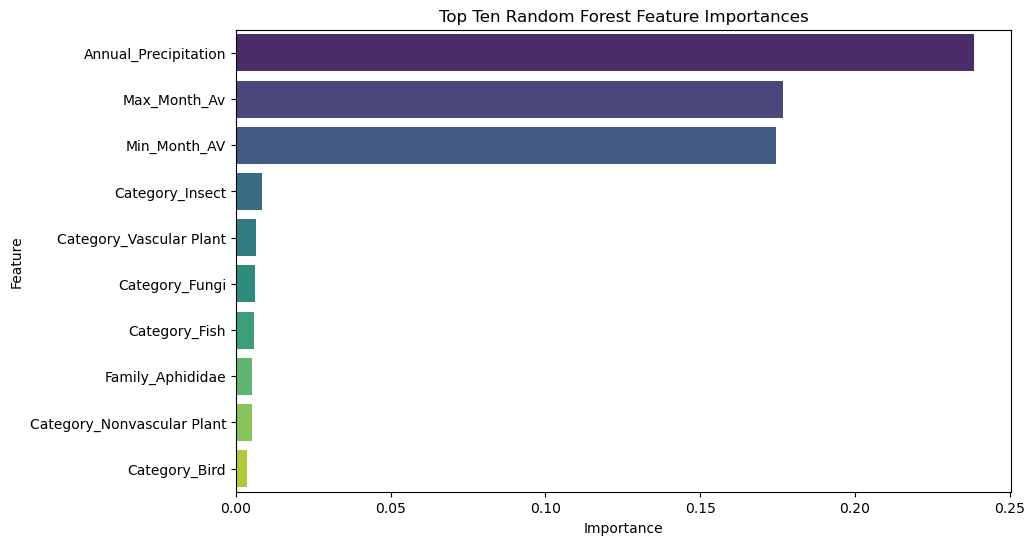

In [9]:
# Assuming loaded_model is your RandomForestClassifier
# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier_grouped.feature_importances_

# Assuming ACT_inputs2_encoded.columns contains the names of your features
feature_names = ACT_inputs2_encoded.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top ten features
top_ten_features = feature_importance_df.head(10)

# Plot the top ten feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_ten_features, palette='viridis')
plt.title('Top Ten Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.show()